# Image Compression using K-means Clustering
This is an implementation of K-means algorithm used to compress an image by reducing the number of colors that occur in the image to only the most common colors in that image.

The number of colors can be selected as an input.

In [80]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Model

In [81]:
def find_closest_centroids(X, centroids):
  """
  Returns the closest centroid for each data point

  Arguments:
    X (ndarray, (m,n)): Input
    centroids (ndarray, (K, n)): centroids

  Returns:
    idx (ndarratm, (m,)): array containing index of closest centroid for each point
  """
  dists = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
  return np.argmin(dists, axis=1)

In [90]:
def recalculate_centroids(X, idx, K):
    """
    Returns the new centroids by computing the mean of the 
    data points in the centroids cluster.
    
    Arguments:
      X (ndarray, (m,n)): Input
      idx (ndarratm, (m,)): array containing index of closest centroid for each point
      K (int):     number of centroids

    Returns:
      centroids (ndarray, (K, n)): centroids
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis=0)

    return centroids

In [83]:
def kMeans(X, K, iterations=10, tolerance=1e-4):
    """
    Runs the K-Means algorithm on data matrix X, using a randomly initialized centroids
    
    Arguments:
      X (ndarray, (m,n)): Input
      K (int): number of clusters
      iterations (int): number of iterations for k-means
      tolerance (float): minimum change in centroids required to stop iterations

    Returns:
      centroids (ndarray, (K, n)): centroids
      idx (ndarratm, (m,)): array containing index of closest centroid for each point
      costs (ndarray, (iterations,)): cost of each iteration
    """
    m, n = X.shape
    randidx = np.random.permutation(m)[:K]
    centroids = X[randidx]

    costs = np.zeros(iterations)

    for i in range(iterations):
        idx = find_closest_centroids(X, centroids)
        new_centroids = recalculate_centroids(X, idx, K)
        
        cost = np.mean(np.linalg.norm(X - new_centroids[idx], axis=1)**2)
        if i > 0 and abs(cost - costs[i-1]) < tolerance:
            break
        
        centroids = new_centroids
        costs[i] = cost

    return centroids, idx, costs[:i+1]

In [101]:
def plot_color(centroids):
    """
    Plots the colors of the K clusters.
    
    Arguments:
      centroids (ndarray, (K, n)): centroids
    """
    K = centroids.shape[0]

    if np.max(centroids) > 1:
      colors = centroids/255.0 # Scale values to range [0, 1]
    else:
      colors = centroids

    plt.figure(figsize=(8, 1))
    plt.title('Compressed Image Colour Palette')
    
    for i, color in enumerate(colors):
        plt.scatter(i+1, 0, color=color.reshape(1,-1), s=500, marker='s')
        plt.xlim([0, K+1])
        plt.ylim([-0.1, 0.1])
        plt.axis('off')

    plt.show()

## Uploading Input

In [10]:
# Upload image
from google.colab import files
uploaded = files.upload()

Saving sparrow.jpeg to sparrow.jpeg


In [91]:
# Load an image of a bird
original = plt.imread(str(list(uploaded.keys())[0]))

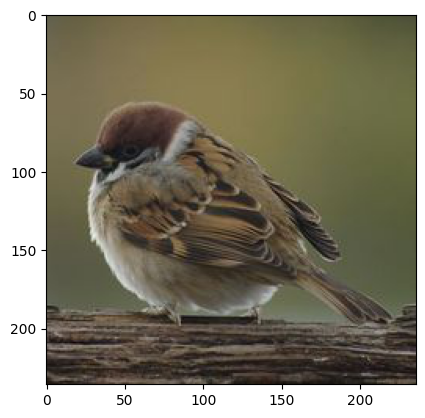

In [92]:
# Visualizing the image
plt.imshow(original)

In [93]:
# Check dimensions of the input
original.shape

(236, 236, 3)

## Preprocessing

In [94]:
# Reshape the input into an m x 3 matrix where m = number of pixels
# Each row will contain the Red, Green and Blue pixel values

X = np.reshape(original, (original.shape[0] * original.shape[1], 3))

## Running K-Means on image pixels

In [95]:
K = 16
iterations = 10
tolerance = 1e-4

# Running K-Means
centroids, idx, cost = kMeans(X, K, iterations, tolerance)

## Image Compression

In [96]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X, centroids)

# Replace each pixel with the color of the closest centroid
if np.max(centroids) > 1:
  X_recovered = centroids[idx, :]/255.0   # for non PNG type files
else:
  X_recovered = centroids[idx, :]   # for PNG files

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original.shape) 

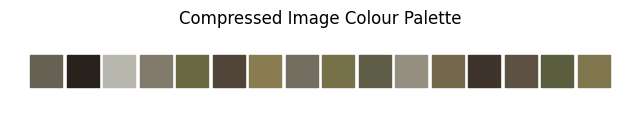

In [102]:
# color palette in the compressed image
plot_color(centroids)

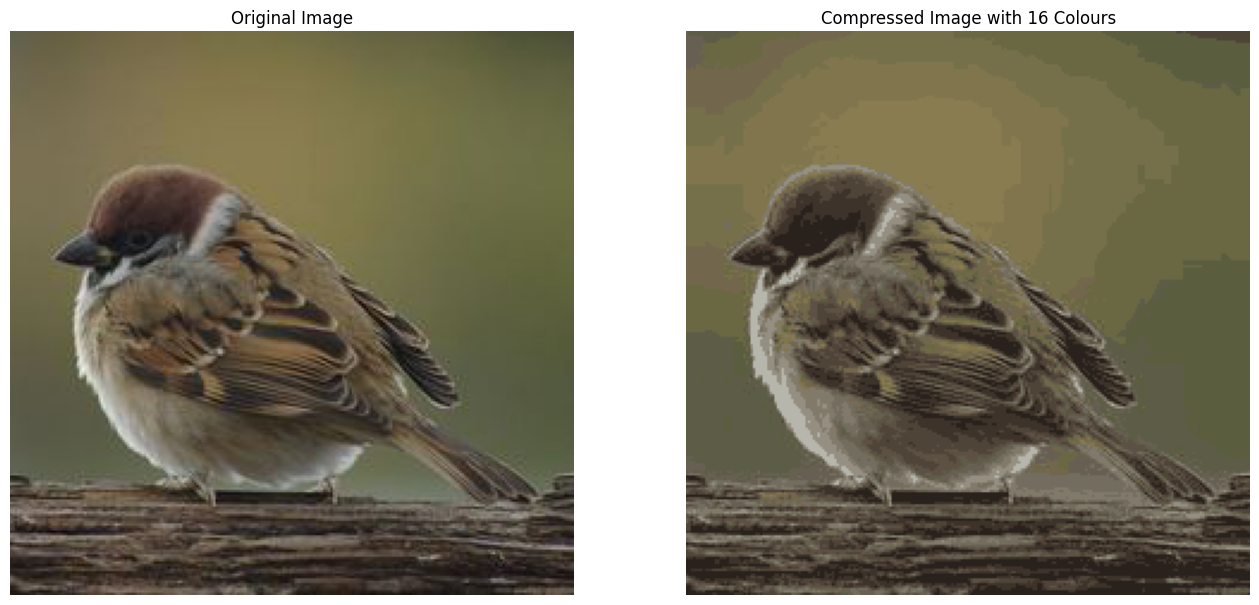

In [98]:
fig, ax = plt.subplots(1,2, figsize=(16,16))

# Display original image
ax[0].imshow(original)
ax[0].set_title('Original Image')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title(f'Compressed Image with {K} Colours')
ax[1].set_axis_off()